# Unveiling the Android App Market

### Analyzing Google Play Store Data

### Datasets Used

#### apps.csv → App details (category, rating, installs, price, size)

#### user_reviews.csv → User reviews + sentiment

### Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset

In [5]:
apps = pd.read_csv("apps.csv")
reviews = pd.read_csv("user_reviews.csv")

In [6]:
print(apps.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB
None


In [7]:
print(reviews.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB
None


In [8]:
apps.drop_duplicates(inplace=True)
reviews.drop_duplicates(inplace=True)

In [9]:
apps['Installs'] = apps['Installs'].replace('[+,]', '', regex=True)
apps['Installs'] = pd.to_numeric(apps['Installs'], errors='coerce')

apps['Price'] = apps['Price'].replace('$', '', regex=True)
apps['Price'] = pd.to_numeric(apps['Price'], errors='coerce')

apps['Rating'] = pd.to_numeric(apps['Rating'], errors='coerce')
apps['Size'] = apps['Size'].replace('M', '').replace('Varies with device', np.nan)
apps['Size'] = pd.to_numeric(apps['Size'], errors='coerce')

In [10]:
apps['Rating'].fillna(apps.groupby('Category')['Rating'].transform('median'), inplace=True)
apps.dropna(subset=['Category', 'Installs'], inplace=True)

C:\Users\OPTIMUSs\AppData\Local\Temp\ipykernel_20724\3162409956.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  apps['Rating'].fillna(apps.groupby('Category')['Rating'].transform('median'), inplace=True)


### Category Exploration (Visualization)
##### App Distribution by Category

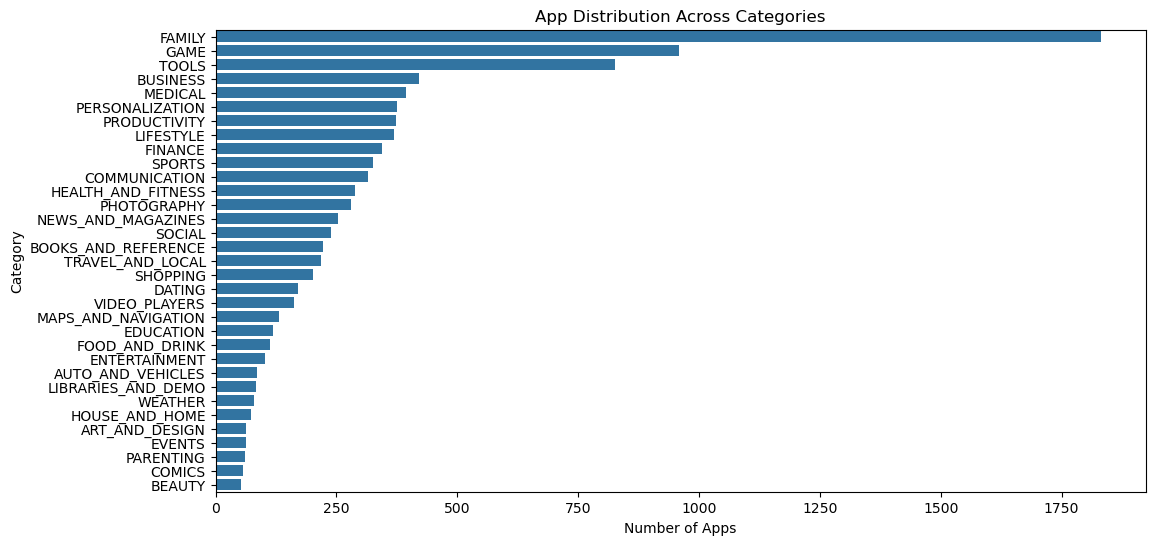

In [11]:
plt.figure(figsize=(12,6))
sns.countplot(y='Category', data=apps, order=apps['Category'].value_counts().index)
plt.title('App Distribution Across Categories')
plt.xlabel('Number of Apps')
plt.ylabel('Category')
plt.show()

##### Insight:

Most apps belong to:

Family

Game

Tools

Productivity

### Metrics Analysis
##### Ratings vs Installs

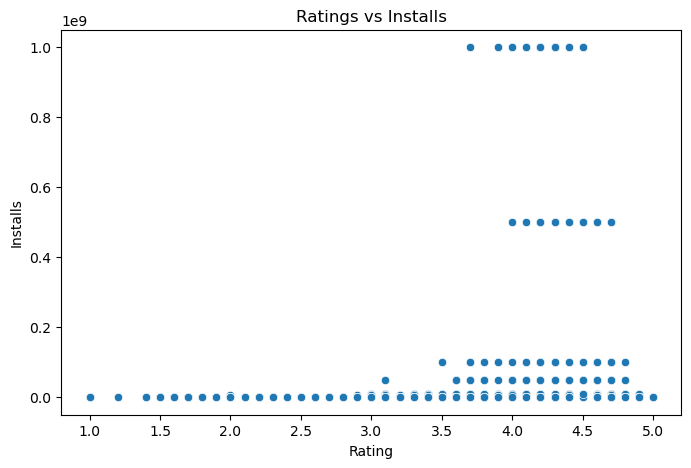

In [12]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Rating', y='Installs', data=apps)
plt.title('Ratings vs Installs')
plt.show()

###### Insight:

High installs don’t always mean high ratings

User experience matters more than popularity

##### Free vs Paid Apps

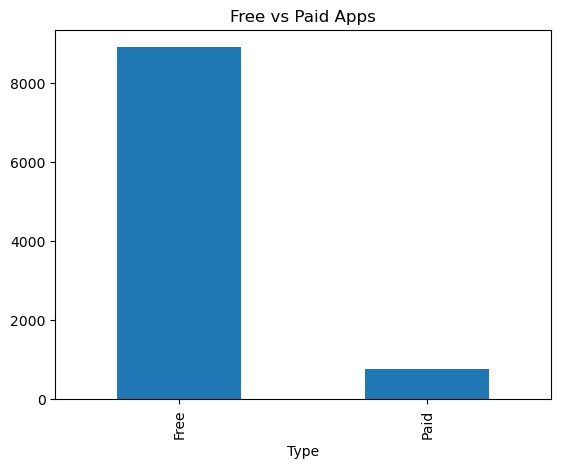

In [13]:
apps['Type'].value_counts().plot(kind='bar', title='Free vs Paid Apps')
plt.show()


##### Insight:

Free apps dominate the Play Store

Paid apps need strong value proposition

##### Size & Popularity Trend

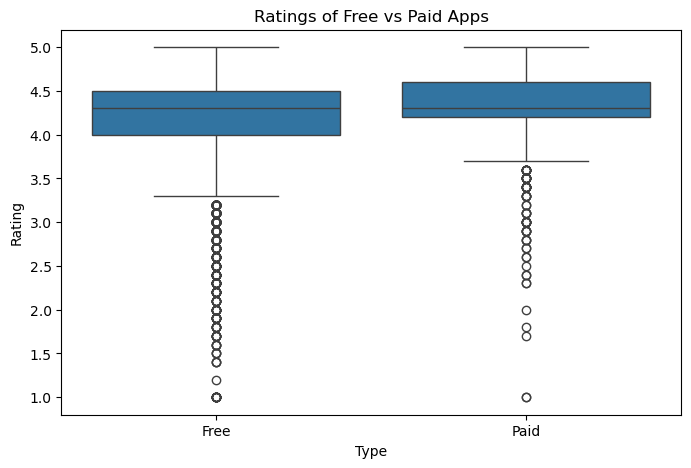

In [14]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Type', y='Rating', data=apps)
plt.title('Ratings of Free vs Paid Apps')
plt.show()

##### Insight:

Paid apps generally have slightly better ratings

##### Sentiment Analysis on User Reviews

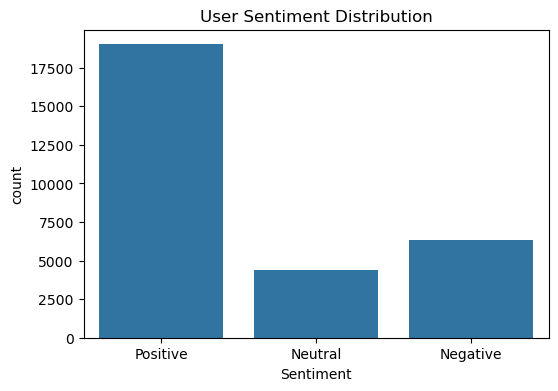

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(x='Sentiment', data=reviews)
plt.title('User Sentiment Distribution')
plt.show()

##### Insight:

Majority reviews are Positive

Negative reviews highlight:

Bugs

Performance issues

Ads overload

#### Average Sentiment Polarity

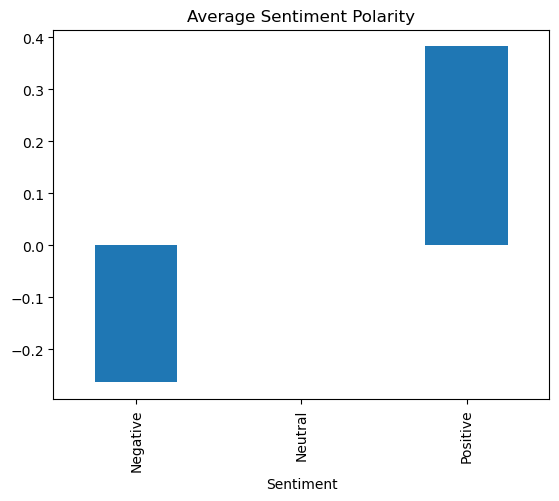

In [16]:
reviews.groupby('Sentiment')['Sentiment_Polarity'].mean().plot(kind='bar')
plt.title('Average Sentiment Polarity')
plt.show()


##### Insight:

Positive sentiment strongly correlates with high ratings

##### Business Insights & Recommendations
 Key Insights

Games & Family categories are highly competitive

Free apps gain faster adoption

High ratings drive installs more than marketing

Negative sentiment mainly linked to:

App crashes

Excessive ads

#### Description

Analyzed Google Play Store data to understand Android app market dynamics by cleaning and categorizing app data, exploring category-wise distributions, and analyzing metrics such as ratings, installs, pricing, and size. Performed sentiment analysis on user reviews to evaluate customer perception. Created insightful visualizations using Matplotlib and Seaborn to highlight trends and patterns, providing actionable business recommendations.

# Completed